In [1]:
from typing import Any, List, Tuple, LiteralString

import sympy
from sympy import Eq, latex, plot, plot_implicit, Matrix, simplify, expand, collect
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from IPython.display import Latex

# Практическое занятие 12
# Компьютерный практикум по алгебре на Python
### Задание 1.
Составить матрицу квадратичной формы $7x^2+10\sqrt{3}xy-3y^2−20z^2$, проверить, что она определяет именно заданное уравнение. Найти и вывести на экран собственные числа и собственные векторы матрицы квадратичной формы. 

In [2]:
from sympy.abc import x, y, z
from typing import overload

@overload
def print_expr(text: str | None = None, expression: str | sympy.AtomicExpr | None = None, raw: bool = True) -> None:
    ...

def print_expr(*args, **kwargs) -> None:
    text: str | None = kwargs.get("text", None)
    expression: Any | str | None = kwargs.get("expression", None)

    if text is None and args:
        text = args[0]
    
    if expression is None:
        if len(args) > 1:
            expression = args[1]
        else:
            if text is not None:
                display(Latex("$\\text{" + text + "}$"))         
            return

    if kwargs.get("raw", True):
        expression = latex(expression)
    
    expression = '$' + expression + '$'
    if text is not None:
        expression = "$\\text{" + text + "}$ " + expression

    display(Latex(expression))

u = 7*x*x + 10*sympy.sqrt(3)*x*y - 3*y*y - 20*z*z
A: Matrix = sympy.Matrix([
    [7, 5*sympy.sqrt(3), 0],
    [5*sympy.sqrt(3), -3, 0],
    [0, 0, -20],
])
X: Matrix = Matrix([x, y, z])
quad_form_matrix: Matrix = X.T * A * X
quadr_form = sympy.expand(quad_form_matrix[0])

print_expr("Исходная квадратичная форма u:", u)
print_expr("Квадратичная форма при помощи матрицы ", f"X^T A X: {latex(quadr_form)}", raw=False)
print_expr(expression=f"X^T A X - u = {latex(quadr_form - u)}", raw=False)

for lambd, mult, vects in quad_form_matrix.eigenvects():
    print_expr("Собственное число:", sympy.simplify(lambd))
    print_expr("Соответствующий собственный вектор:", vects[0])

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Привести квадратичную форму Примера 1 к каноническому виду с помощью перехода к новому базису из собственных векторов.

In [3]:
P: Matrix = Matrix([Matrix([vect.normalized() for vect in vects]).T for _, _, vects in A.eigenvects()]).T
print_expr("Матрица перехода:", P)

A_new: Matrix = P**(-1) * A * P
print_expr("Матрица квадратичной формы в каноническом виде:", A_new)
print_expr("Квадратичная форма в каноническом виде:", simplify(Eq((X.T * A_new * X)[0], 0)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 3.
Определить тип кривой второго порядка, заданной уравнением
$$
97x^2 - 144xy + 97y^2 + 482x - 532y = 3452
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

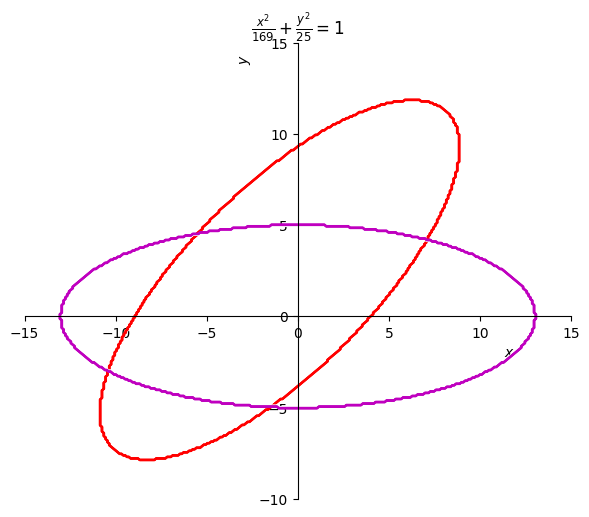

In [4]:
from sympy.abc import x, y, X, Y

A: Matrix = Matrix([
    [97, -72, 241],
    [-72, 97, -266],
    [241, -266, -3452]
])
X_vars: Matrix = Matrix([x, y, 1])
print_expr("Матрица квадратичной формы:", A)
eq = Eq(expand(X_vars.T * A * X_vars)[0], 0)
print_expr(expression=f"X^T A X = {latex(eq)}", raw=False)

alpha = sympy.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2
P: Matrix = simplify(Matrix([
    [Cos(alpha), -Sin(alpha), 0],
    [Sin(alpha), Cos(alpha), 0],
    [0, 0, 1]
]))
print_expr("Матрица поворота:", P)
A_new: Matrix = simplify(P.T * A * P)
X_vars = Matrix([X, Y, 1])
eq1 = expand((X_vars.T * A_new * X_vars)[0])
print_expr("Уравнение кривой:", Eq(eq1, 0))

X_vars_new: Matrix = Matrix((X - A_new[0, 2] / A_new[0, 0], Y - A_new[1, 2] / A_new[1, 1], 1))
eq_new = simplify(expand((X_vars_new.T * A_new * X_vars_new)[0]))
eq_new = eq_new / -eq_new.subs({X: 0, Y: 0}) + 1
eq_new_xy = Eq(eq_new.subs({X: x, Y: y}), 1)
print_expr("Уравнение кривой после замены и преобразование:", eq_new_xy)

x_label_align: LiteralString = "\t\t\t\t\t\t\t\t\t\t\t\t"
y_label_align: LiteralString = "\t\t\t\t\t\t\t\t\t\t\t\t"
p = plot_implicit(
    eq,
    (x, -15, 15),
    (y, -10, 15),
    line_color='r',
    aspect_ratio=(1, 1),
    adaptive=False,
    show=False,
    title='$' + latex(eq_new_xy) + '$',
    xlabel=x_label_align + "$x$",
    ylabel=y_label_align + "$y$",
    size=(6, 6),
)
p.extend(plot_implicit(
    eq_new_xy,
    (x, -15, 15),
    (y, -10, 15),
    line_color='m',
    aspect_ratio=(1, 1),
    adaptive=False,
    show=False
))
p.show()

### Задание 4.
Определить тип кривой второго порядка, заданной уравнением
$$
x^2+2xy+y^2-4x+4y=4
$$
Построить в одной координатной плоскости график заданного уравнения и канонического уравнения соответствующей кривой, каноническое уравнение сделать названием графика. 

Указание: каноническое уравнение параболы $y^2 = 2px$ или $x^2 = 2py$; для того, чтобы выразить $x$ или $y$ можно воспользоваться solve или solveset.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

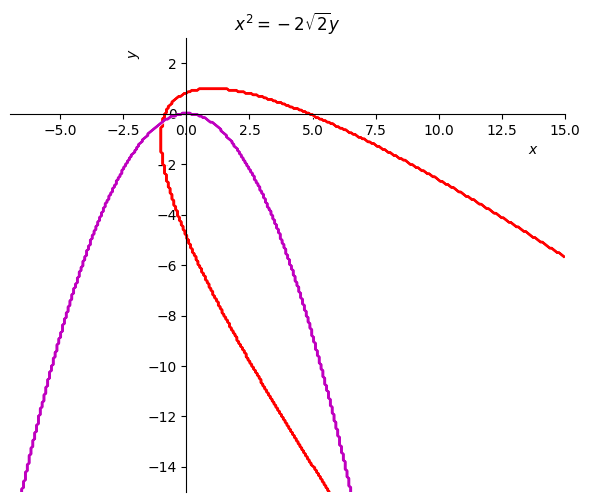

In [5]:
from sympy.abc import x, y, X, Y

A: Matrix = Matrix([
    [1, 1, -2],
    [1, 1, 2],
    [-2, 2, -4]
])
X_vars: Matrix = Matrix([x, y, 1])
print_expr("Матрица квадратичной формы:", A)
eq = Eq(expand(X_vars.T * A * X_vars)[0], 0)
print_expr(expression=f"X^T A X = {latex(eq)}", raw=False)

alpha = sympy.acot((A[0, 0] - A[1, 1]) / (2 * A[0, 1])) / 2
P: Matrix = Matrix([
    [Cos(alpha), -Sin(alpha), 0],
    [Sin(alpha), Cos(alpha), 0],
    [0, 0, 1]
])
print_expr("Матрица поворота:", P)

A_new: Matrix = simplify(P.T * A * P)
print_expr("Новая матрица квадратичной формы:", A_new)

X_vars = Matrix([X, Y, 1])
eq_new = expand((X_vars.T * A_new * X_vars)[0])
print_expr("Уравнение кривой:", Eq(eq1, 0))

X_vars_new: Matrix = Matrix([X, Y - A_new[1, 2] / A_new[2, 2], 1])
eq_new = simplify((X_vars_new.T * A_new * X_vars_new)[0] / 2)
eq_new_xy = Eq(x*x, sympy.solve(eq_new, X*X)[0].subs({Y: y}))
print_expr("Уравнение кривой после преобразований:", eq_new_xy)

x_label_align: LiteralString = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t"
y_label_align: LiteralString = "\t\t\t\t\t\t\t\t\t\t\t\t"
p = plot_implicit(
    eq,
    (x, -7, 15),
    (y, -15, 3),
    line_color='r',
    aspect_ratio=(1, 1),
    adaptive=False,
    show=False,
    title='$' + latex(eq_new_xy) + '$',
    xlabel=x_label_align + "$x$",
    ylabel=y_label_align + "$y$",
    size=(6, 6),
)
p.extend(plot_implicit(
    eq_new_xy,
    (x, -7, 15),
    (y, -15, 3),
    line_color='m',
    aspect_ratio=(1, 1),
    adaptive=False,
    show=False
))
p.show()

###  Индивидуальное задание
Составить матрицу квадратичной формы и привести ее к каноническому виду с помощью перехода к новому базису из собственных векторов. Векторы выводить на экран не нужно. Вывести на экран матрицу в исходном виде и канонической форме, а также саму квадратичную форму в каноническом виде.

In [6]:
from sympy.abc import x, y
from sympy import sqrt

Q = 2791*x*x + 108*sqrt(11)*x*y + 418*sqrt(3)*x*z - 1364*y*y - 108*sqrt(33)*y*z + 2373*z*z
A: Matrix = sympy.Matrix([
    [2791, 54*sqrt(11), 209*sqrt(3)],
    [54*sqrt(11), -1364, -54*sqrt(33)],
    [209*sqrt(3), -54*sqrt(33), 2373],
])

print_expr("Матрица квадратичной формы:", A)

X: Matrix = Matrix([x, y, z])
quad_form_matrix: Matrix = X.T * A * X
quadr_form = sympy.expand(quad_form_matrix[0])

print_expr("Квадратичная форма при помощи матрицы ", f"X^T A X: {latex(quadr_form)}", raw=False)
print_expr(expression=f"X^T A X - Q = {latex(quadr_form - Q)}", raw=False)

P: Matrix = Matrix([Matrix([vect.normalized() for vect in vects]).T for _, _, vects in A.eigenvects()]).T
print_expr("Матрица перехода:", P)
A_new: Matrix = P**(-1) * A * P
print_expr("Матрица квадратичной формы в каноническом виде:", A_new)
print_expr("Квадратичная форма в каноническом виде:", simplify(Eq((X.T * A_new * X)[0], 0)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>